# <center> Lab 3 Examples 
## <center>    Implicit Differentiation
    
In this lab, we will learn how to perform implicit differentiation and how to plot curves.

**Video**: https://youtu.be/TQZOvWxr44o
    
We start with importing needed libraries. We will use NumPy, SymPy and Matlplotlib. 
    
I will also add symbols 'x' and 'y' for SymPy.


In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt


sp.var('x y')  

(x, y)

Suppose we have a curve $\left(x^{2}+y^{2}\right)^{2}=10x^{2}-20y^{2}$. We need to plot it and to find $\frac{dy}{dx}$. We will also see how to plot the tangent line with the curve.

Let's start with defining the curve. Your curve has to be defined in the form `Expr=0`. So, we need to move all terms from the right to the left. Note we need two variables x and y that we created above.

In [2]:
Eq=(x**2+y**2)**2-10*x**2+20*y**2
Eq

-10*x**2 + 20*y**2 + (x**2 + y**2)**2

Now let's plot it. There are two ways to plot this. We can use SymPy command `plot_implicit` or we can use matplotlib command `contour` with `meshgrid`. 
The first method is easy to use especially if you need to plot just one curve. Usually it's an OK method if you want a quick glance on the curve. The second method requires more code, but it is a lot more flexible (you can plot different types of graphs together, beautify the plot easily, etc). Usually the second method is a better approach.

Here is how you do it with SymPy:

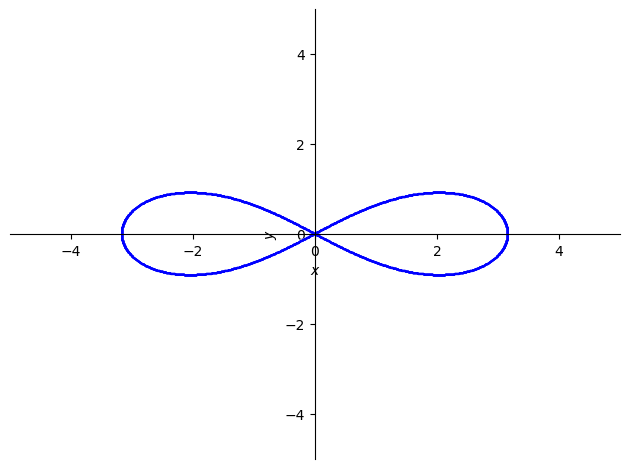

In [3]:
sp.plot_implicit(Eq, adaptive=False, points=600)

Here is the second way to plotting it:

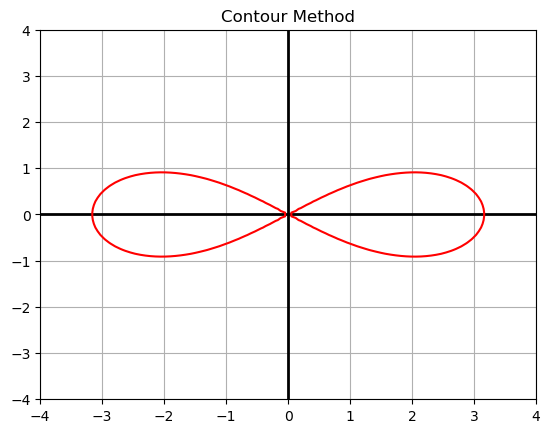

In [5]:
# We need to lambdify the expression first, noting that we have two variables.
# In essence, we are creating a function with two variables, x and y.

f = sp.lambdify([x, y], Eq)   

# Now we plot

fig=plt.figure()

# Here we are creating a mesh of points. xx are all x-coordinates, yy are all y-coordinates
# and meshrid creates all possible pairings of xx and yy.
# these pairing are stored in xxx and yyy

xx = np.linspace(-4, 4, 100)
yy = np.linspace(-4, 4, 100)
xxx, yyy = np.meshgrid(xx, yy)

plt.axhline(0, color='black', lw=2)  
plt.axvline(0, color='black', lw=2)  

# Here we are creating the curve. The [0] part is the zero on the right side of equation.
plt.contour(xxx, yyy, f(xxx, yyy), [0], colors='red')

plt.title('Contour Method')
plt.grid()
plt.show()

As you can see, the second method does look a bit nicer too.

Let's find all points that have $x$-coordinate equal to 1.5. To do this, we can plug in 1.5 for x, creating equation with just $y$, and solving it for $y$.

In [6]:
yeq=Eq.subs(x,1.5)
yeq

20*y**2 + 5.0625*(0.444444444444444*y**2 + 1)**2 - 22.5

In [7]:
ysol=sp.solve(yeq,y)
ysol

[-0.831973019721664,
 0.831973019721664,
 -5.01918111902179*I,
 5.01918111902179*I]

As you can see, we have some imaginary (containing I) and some real solutions. We only care about real ones, so let's save them. Note: We coud have used `solveset` as well here, but you would have to save the numbers manually since solveset doesn't create an array.

In [8]:
y1=ysol[0]  # first number
y2=ysol[1]  # second number
y1,y2

(-0.831973019721664, 0.831973019721664)

Next let's create a tangent line at the point $(1.5, y2)$. Do this we need to find derivative and then evaluate it at our desired values. Command `sp.idiff` will find the derivative. Note the order of x and y inside `sp.idiff` matters. ($\frac{dy}{dx}$ versus $\frac{dx}{dy}$). It is usually useful to add `sp.simplify` as well to get cleaner expression (not always needed though)

In [9]:
eqd = sp.simplify(sp.idiff(Eq,y,x))
eqd

x*(-x**2 - y**2 + 5)/(y*(x**2 + y**2 + 10))

Next we plug in the  $(1.5, y2)$. Take note of syntax:

In [10]:
m=eqd.subs({x:1.5, y:y2})
m

0.286669958328536

To get the tangent line we can use point-slope form  $y-y_1=m(x-x_1)$. It is more convinient to move $y_1$ to th toher side though, so we can think of the line as a function:  $$y=y_1+m(x-x_1).$$

This representation will be useful for more than just this Lab.

In [11]:
tan=y2+m*(x-1.5)
print('Our tangent line is y=',tan)

Our tangent line is y= 0.286669958328536*x + 0.40196808222886


Finally, let's plot both the graph and the tangent line. In this case, `contour` way is a better way:

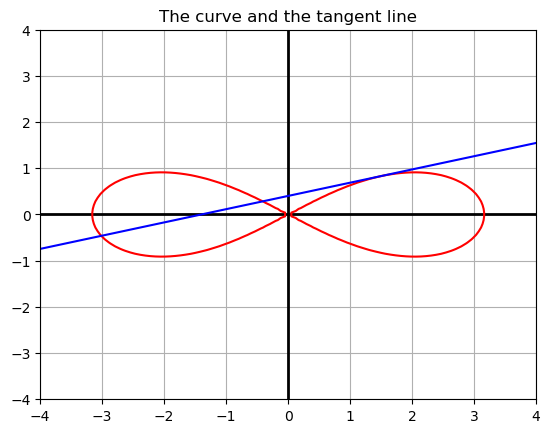

In [12]:
fig=plt.figure()

tann=sp.lambdify(x,tan)

xx = np.linspace(-4, 4, 100)
yy = np.linspace(-4, 4, 100)
xxx, yyy = np.meshgrid(xx, yy)

plt.ylim(-4, 4)
plt.xlim(-4,4)

plt.axhline(0, color='black', lw=2)  
plt.axvline(0, color='black', lw=2)  

plt.contour(xxx, yyy, f(xxx, yyy), [0], colors='red')
plt.plot(xx, tann(xx), color='blue')

plt.title("The curve and the tangent line")
plt.grid()
plt.show()